In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



In [2]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Gráfico de barras
ideal para mostrar **CAMBIOS EN MAGNITUD**

SOLO SI TENGO POCAS VARIABLES CATEGORICAS

No recomendable mostrar proporciones entre categorias

El gráfico de barras clásico utiliza barras horizontales o verticales (gráfico de columnas) para mostrar comparaciones numéricas discretas entre categorías. Un eje del gráfico muestra las categorías específicas que se comparan y el otro eje representa una escala de valores discretos.

Los gráficos de barras se distinguen de los Histogramas, ya que no muestran desarrollos continuos durante un intervalo. Los datos discretos de los gráficos de barras son datos categóricos y por lo tanto responden a la pregunta de «¿cuántos?» En cada categoría.

Un fallo importante con los gráficos de barras es el etiquetado, que se convierte en problemático cuando hay un gran número de barras.

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# cuantos pasajeros hombres y cuantos pasajeros mujeros hubieron
pasajeros=df.groupby("Sex").agg({
    "PassengerId": "count"
})
pasajeros

,PassengerId
Sex,
female,314
male,577


<Axes: title={'center': 'Cantidad de pasajeros por genero'}, xlabel='Sex'>

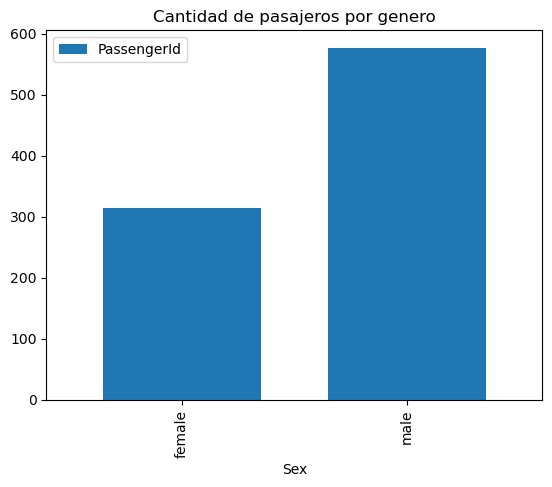

In [21]:
pasajeros.plot.bar(
    y="PassengerId",
    width=0.7, # porcentaje del ancho de la barra
    title="Cantidad de pasajeros por genero"
)

In [22]:
import seaborn as sns

In [23]:
pasajeros = pasajeros.reset_index()
pasajeros

,Sex,PassengerId
0,female,314
1,male,577


<Axes: xlabel='Sex', ylabel='PassengerId'>

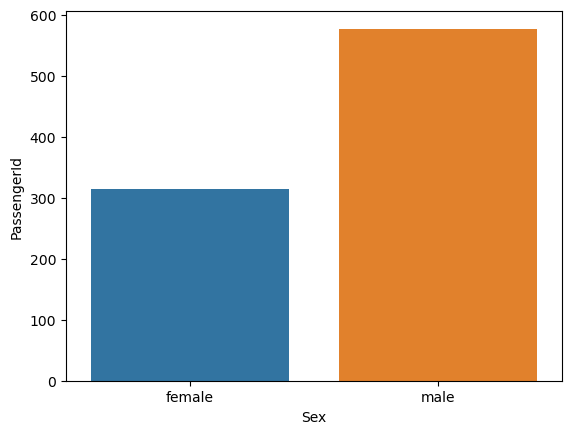

In [24]:
sns.barplot(
    pasajeros,
    x="Sex",
    y="PassengerId",
)

In [22]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

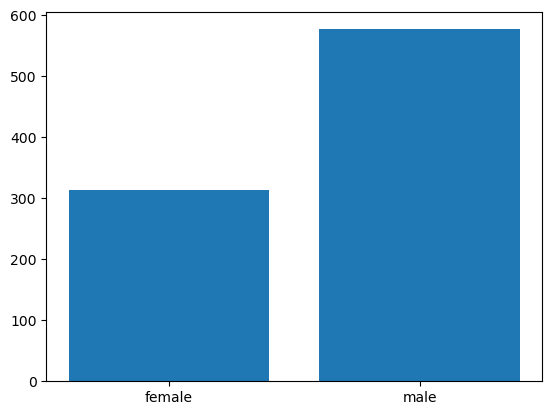

In [26]:
plt.bar(
    pasajeros["Sex"],
    pasajeros["PassengerId"]

)

# Gráfico de Pie y Dona
Cada sección qué parte porcentual de un todo posee un grupo/categoría

PARTES PORCENTUALES DE UN TODO
No se usa para ver cambios en magnitud

PORCENTUALES o PROPORCIONES

Si tengo muchas categorías no es recomendable o si solo son 2

Si tienen porciones parecidas no es recomendable. Para este caso es mejor un gráfico de barras (eje y: porcentaje, eje x: categoría)

No es recomendable mostrar solo el gráfico, es mejor presentarlo con un contexto

NO COMPARAR ENTRE GRÁFICOS DE PIE

Es comun usar paletas de colores variados para representar las partes porcentuales A DIFERENCIA DE LOS GRAFICOS DE BARRAS, o resaltar colores para presentar la parte importante


**El orden es la parte porcentual más grande a la más pequeña en sentido horario**

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# cuantos pasajeros hombres y cuantos pasajeros mujeros hubieron
pasajeros=df.groupby("Sex").agg({
    "PassengerId": "count"
})
pasajeros = pasajeros.reset_index()
pasajeros

,Sex,PassengerId
0,female,314
1,male,577


<Axes: ylabel='PassengerId'>

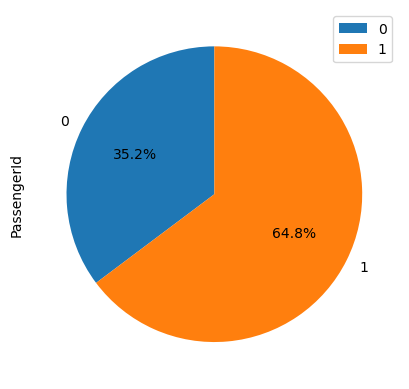

In [8]:
pasajeros.plot.pie(
    y="PassengerId",
    startangle=90,# angulo de inicio 
    autopct="%1.1f%%" # formato de los porcentajes 
    #el ".1" es la cantidad de decimales
) # imagen

In [9]:
# graficos interactivos
import plotly.express as px

In [12]:
fig=px.pie(
    #se pasa el df
    pasajeros,
    names = "Sex", # nombre de la categoria
    values = "PassengerId", # cantidad de pasajeros
    title = "Cantidad de pasajeros por genero"
)
fig.show() # grafica interactiva

In [13]:
# ver las clases de pasajeros
clases=df.groupby("Pclass").agg({
    "PassengerId": "count"
})
clases = clases.reset_index()
clases

,Pclass,PassengerId
0,1,216
1,2,184
2,3,491


In [16]:
fig=px.pie(
    #se pasa el df
    clases,
    names = "Pclass", # nombre de la categoria
    values = "PassengerId", # cantidad de pasajeros
    title = "Cantidad de pasajeros por clase",
    hole = 0.5 # tamaño del hueco
)
fig.show() # grafica interactiva

# Gráfico de Cajas
**Para mostrar datos estadísticos (cuartiles)**

![ejemplo de cuartil](https://chartio.com/assets/79165a/tutorials/charts/box-plots/e30a92b3850d486bef6d0752caaa3d110944b25c9ef3043d821a4998c32bb526/box-plot-construction.png)

La caja es mi delimitador, se encuentra el 50% de mis datos, a un extremo de la caja se encuentra mi CUARTIL 1 y al otro extremo mi CUARTIL 3. La línea que se encuentra en medio de la caja es mi MEDIANA. Los bigotes (líneas que se extiende de mi caja) representa el límite de lo que es normal en mi distribución, cualquier punto que este fuera de la línea son VALORES ABERRANTES (outliers)

![ejemplo de cuartil](https://chartio.com/assets/02f899/tutorials/charts/box-plots/df238381ecd10e5a53ced490d61b587cdbb81d9b9aeb51351e787a324dbeebae/box-plot-variable-width.png)
el eje x es el rango de mi variable numerica, el eje y es mi variable categórica

USADO PARA COMPARAR DIVERSOS GRUPOS A TRAVÉS DE ESTATISTICAS (MEDIA Y CUARTILES)
OBSERVAR DATOS ABERRANTES DENTRO DE MIS VARIABLES.

SI LA CAJA SE ENCUENTRA MÁS HACIA LA DERECHA, SIGNIFICA QUE TIENDE A MAYORES VALORES

In [2]:
# edad entre hombre y mujeres ¿hay diferencia?
import pandas as pd
df = pd.read_csv("titanic.csv")
df = df.dropna(subset=["Age"], axis = "index") # eliminar los valores nulos
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


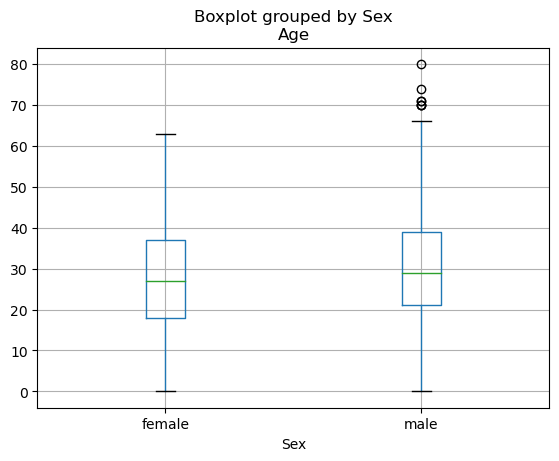

In [24]:
# en este caso no me toca agrupar
df.boxplot(
    column = "Age",
    by = "Sex"
)
plt.show()

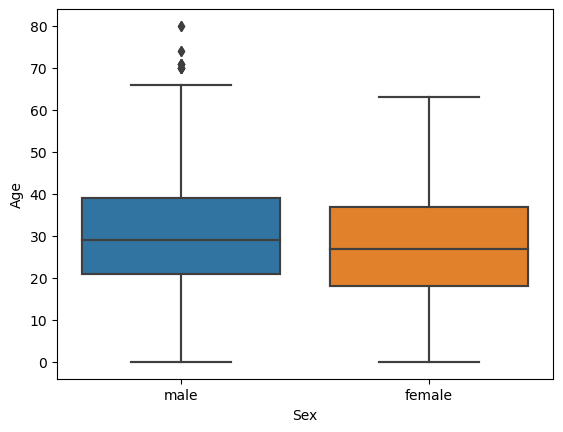

In [26]:
import seaborn as sns
sns.boxplot(
    data = df,
    x = "Sex",
    y="Age"
)
plt.show()

# Gráfico de Violín

![ej de violin](https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/diagrama_de_violin.svg)

Es una combinación de un gráfico de cajas y un gráfico de densidad. Muestra la **distribución de los datos** y su densidad de probabilidad.

La curva muestra la distribución de mis datos

**si solo men interesa cómo se distribuyen mis datos, es mejor un gráfico de violin, caso contrario un gráfico de cajas**


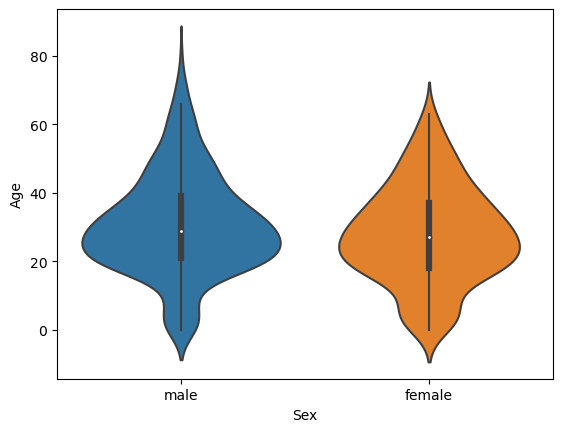

In [27]:
# SOLO EN SEABORN SE USA PARA HACER ESTE GRÁFICO
sns.violinplot(
    data = df,
    x = "Sex",
    y= "Age"
)
plt.show()

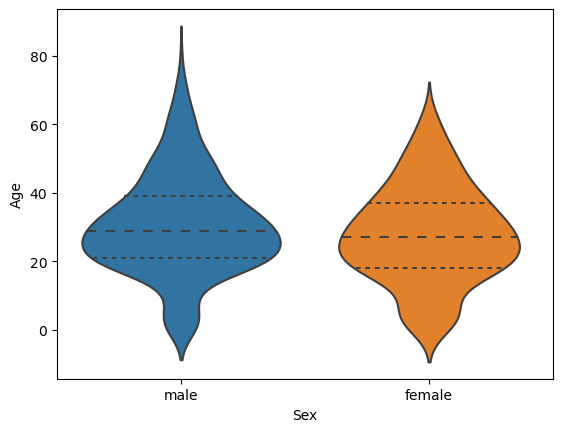

In [28]:
sns.violinplot(
    data = df,
    x = "Sex",
    y= "Age",
    inner = "quartiles" # para que se vean los cuartiles
)
plt.show()

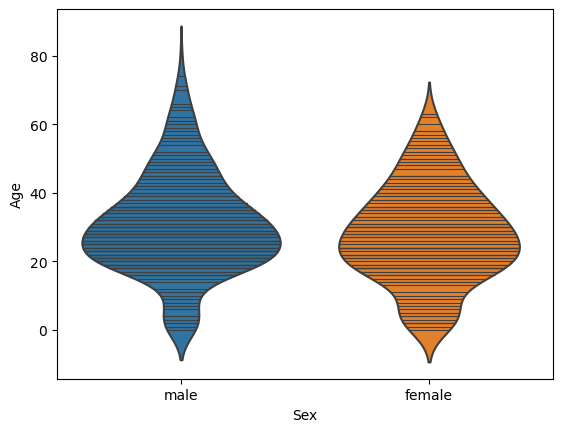

In [29]:
sns.violinplot(
    data = df,
    x = "Sex",
    y= "Age",
    inner = "stick"
)
plt.show()

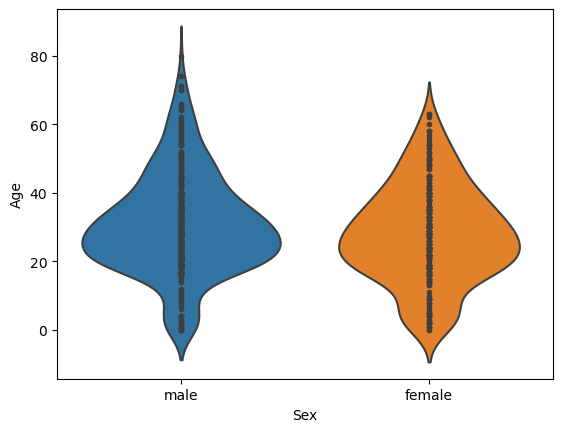

In [30]:
sns.violinplot(
    data = df,
    x = "Sex",
    y= "Age",
    inner = "point"
)
plt.show()

# Histograma

**Para mostrar la distribución de mis datos**

![histograma](https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/histograma.svg)

me muestra cómo se distribuye mi variable numérica a través del conjunto

La altura de las barras me muestra la frecuencia o cuantos puntos de mis datos existen dentro de ese rango

TIENEN QUE TENER EL MISMO RANGO

**PRIMER GRÁFICO QUE SE HACE PARA ENTENDER LA DISTRIBUCION DE MIS DATOS**

me permite derivar otros análisis complejos

EJE X: RANGO DE MI VARIABLE NUMÉRICA
EJE Y: FRECUENCIA


array([<Axes: title={'center': 'female'}>,
       <Axes: title={'center': 'male'}>], dtype=object)

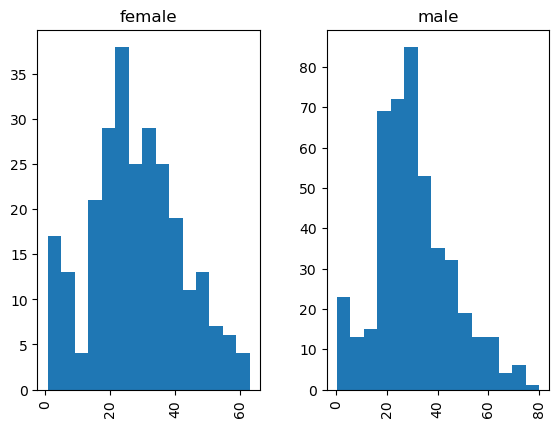

In [10]:
# distribución de edad entre hombres y mujeres
df.hist(
    "Age",
    by = "Sex",
    bins = 15
)

# Gráfico de densidad /kernel

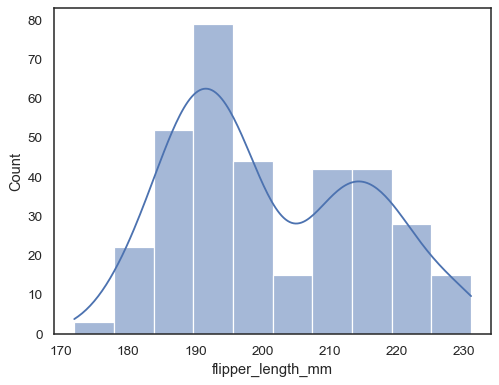

Crea una curva de densidad que representa la distribución de mis datos

La curva que se crea me indica en el eje Y la probabilidad de que una nueva observación caiga en un rango de valores en el eje X

Sirve para observar la forma de la distribución de mis datos

<Axes: xlabel='Age', ylabel='Probability'>

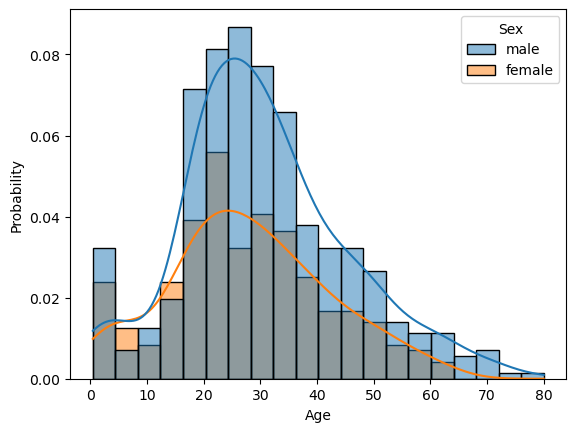

In [18]:
import seaborn as sns
sns.histplot(
    data = df,
    x = "Age",
    kde = True,
    bins=20,
    stat="probability",
    hue = "Sex" # colocar una variable categórica
)

<Axes: xlabel='Age', ylabel='Count'>

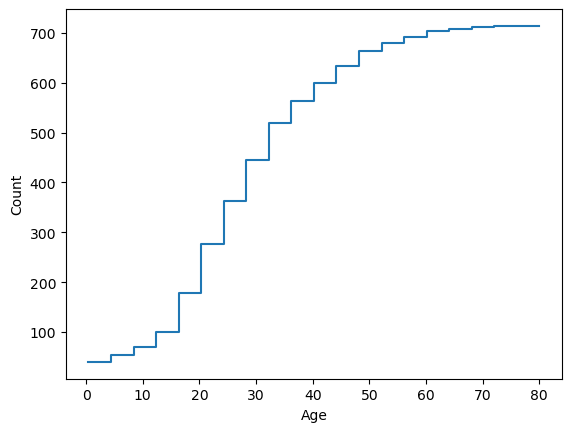

In [21]:
sns.histplot(
    data = df,
    x = "Age",
    cumulative=True,
    bins=20,
    fill=False,
    element="step"
    #hue = "Sex" # colocar una variable categórica
)

# Gráfico de lineas

![image.png](https://datavizcatalogue.com/ES/metodos/images/anatomy/SVG/grafica_de_linea.svg)

Sirve para mostrar la diferencia que han tenido estas variables numéricas a través de mi variable

**MOSTRAR TENDENCIAS DE SUBIDA O DE BAJADA, CUANDO Y A QUÉ RITMO**

EJE X: VARIABLE CATEGÓRICA ORDINALES, uns progresión ordenada de menor a mayor (tiempo, edad, etc)

EJE Y: VARIABLE NUMÉRICA

**A DIFERENCIA DE OTRAS GRÁFICAS, EN EL EJE Y NO ES NECESARIO EMPEZAR DESDE EL 0**

**NO SUAVIZAR LA CURVA**

In [31]:
df = pd.read_csv("tienda_ventas.csv", index_col="id")
df

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.00000,0
1,2013-01-01,1,BABY CARE,0.00000,0
2,2013-01-01,1,BEAUTY,0.00000,0
3,2013-01-01,1,BEVERAGES,0.00000,0
4,2013-01-01,1,BOOKS,0.00000,0
...,...,...,...,...,...
2161561,2016-04-30,9,POULTRY,826.35300,0
2161562,2016-04-30,9,PREPARED FOODS,165.65399,0
2161563,2016-04-30,9,PRODUCE,2012.72700,1


In [32]:
#analizar cómo ha ido cambiando la venta de mis productos por mes y por año
df["yearMonth"] = df["date"].apply(lambda x: x[:7])
df

,date,store_nbr,family,sales,onpromotion,yearMonth
id,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01
1,2013-01-01,1,BABY CARE,0.00000,0,2013-01
2,2013-01-01,1,BEAUTY,0.00000,0,2013-01
3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01
4,2013-01-01,1,BOOKS,0.00000,0,2013-01
...,...,...,...,...,...,...
2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04
2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04
2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04


In [33]:
df = df.groupby("yearMonth").agg({
    "sales": "sum"
}).reset_index()
df

,yearMonth,sales
0,2013-01,1.032762e+07
1,2013-02,9.658960e+06
2,2013-03,1.142850e+07
3,2013-04,1.099346e+07
4,2013-05,1.159770e+07
5,2013-06,1.168934e+07
6,2013-07,1.125740e+07
7,2013-08,1.173779e+07
8,2013-09,1.179293e+07
9,2013-10,1.177562e+07


c:\ProgramData\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:887: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


<Axes: xlabel='yearMonth'>

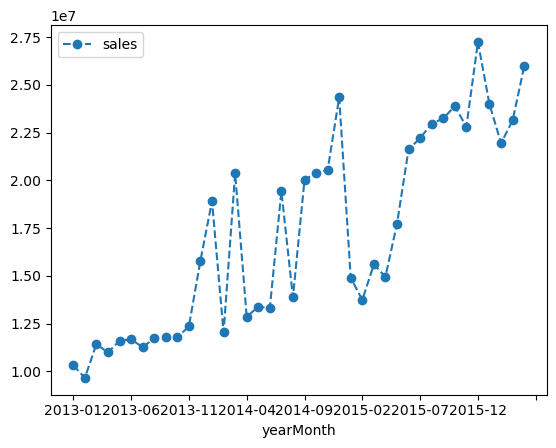

In [37]:
df.plot.line(
    y="sales",
    x="yearMonth",
    style = "o-", # marcadores
    linestyle = "--" # estilo de la linea
)

In [38]:
import plotly.express as px

fig = px.line(
    df,
    x="yearMonth",
    y="sales",
    title="Ventas por mes"
)
fig.show()